<a href="https://colab.research.google.com/github/Yash-1812/ML_DL_Projects/blob/main/Customer_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [ ]:
df = pd.read_csv('Customer_Data.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df = df.drop(columns = 'customerID' , axis = 1)

In [ ]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [ ]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'] , errors = 'coerce')

In [ ]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.dtypes

,0
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object
OnlineBackup,object


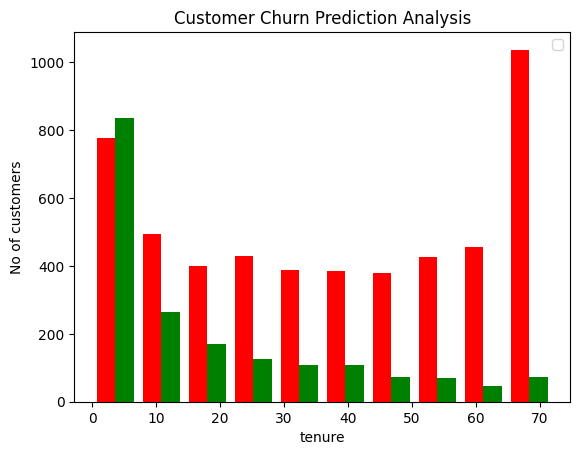

In [ ]:
tenure_churn_no = df[df.Churn == 'No'].tenure
tenure_churn_yes = df[df.Churn == 'Yes'].tenure

plt.hist([tenure_churn_no , tenure_churn_yes] , color = ['red' , 'green'])
plt.legend()
plt.xlabel('tenure')
plt.ylabel('No of customers')
plt.title('Customer Churn Prediction Analysis')
plt.show()

In [ ]:
for columns in df:
  print(f"{columns} : {df[columns].unique()}")

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2

In [ ]:
df.replace("No phone service" , "No" , inplace = True)
df.replace("No internet service" , "No" , inplace = True)

In [ ]:
for columns in df:
  print(f"{columns} : {df[columns].unique()}")

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : ['No' 'Yes']


In [ ]:
# prompt: Replace all Yes and No with 1 and 0

df.replace(['Yes' , 'No'] , [1 , 0] , inplace = True)
for columns in df:
  print(f"{columns} : {df[columns].unique()}")

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService : [0 1]
MultipleLines : [0 1]
InternetService : ['DSL' 'Fiber optic' 0]
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : [1 0]
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : [0 1]


In [ ]:
df.replace(['Female' , 'Male'] , [1 , 0] , inplace = True)

In [ ]:
df.gender.unique()

array([1, 0])

In [ ]:
df = pd.get_dummies(data = df , columns = ['InternetService' , 'Contract' , 'PaymentMethod'])

In [ ]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_0,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,False,True,False,True,False,False,False,False,True,False
1,0,0,0,0,34,1,0,1,0,1,...,False,True,False,False,True,False,False,False,False,True
2,0,0,0,0,2,1,0,1,1,0,...,False,True,False,True,False,False,False,False,False,True
3,0,0,0,0,45,0,0,1,0,1,...,False,True,False,False,True,False,True,False,False,False
4,1,0,0,0,2,1,0,0,0,0,...,False,False,True,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24,1,1,1,0,1,...,False,True,False,False,True,False,False,False,False,True
7039,1,0,1,1,72,1,1,0,1,1,...,False,False,True,False,True,False,False,True,False,False
7040,1,0,1,1,11,0,0,1,0,0,...,False,True,False,True,False,False,False,False,True,False
7041,0,1,1,0,4,1,1,0,0,0,...,False,False,True,True,False,False,False,False,False,True


In [ ]:
df['TotalCharges'].shape

(7043,)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[['tenure' , 'MonthlyCharges' , 'TotalCharges']] = scaler.fit_transform(df[['tenure' , 'MonthlyCharges' , 'TotalCharges']])

In [ ]:
df['MonthlyCharges']

,MonthlyCharges
0,0.115423
1,0.385075
2,0.354229
3,0.239303
4,0.521891
...,...
7038,0.662189
7039,0.845274
7040,0.112935
7041,0.558706


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df.drop(columns = 'Churn' , axis = 1)

In [ ]:
X

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_0,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,0.013889,0,0,0,1,0,...,False,True,False,True,False,False,False,False,True,False
1,0,0,0,0,0.472222,1,0,1,0,1,...,False,True,False,False,True,False,False,False,False,True
2,0,0,0,0,0.027778,1,0,1,1,0,...,False,True,False,True,False,False,False,False,False,True
3,0,0,0,0,0.625000,0,0,1,0,1,...,False,True,False,False,True,False,True,False,False,False
4,1,0,0,0,0.027778,1,0,0,0,0,...,False,False,True,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,0.333333,1,1,1,0,1,...,False,True,False,False,True,False,False,False,False,True
7039,1,0,1,1,1.000000,1,1,0,1,1,...,False,False,True,False,True,False,False,True,False,False
7040,1,0,1,1,0.152778,0,0,1,0,0,...,False,True,False,True,False,False,False,False,True,False
7041,0,1,1,0,0.055556,1,1,0,0,0,...,False,False,True,True,False,False,False,False,False,True


In [ ]:
y = df.Churn

In [ ]:
y

,Churn
0,0
1,0
2,1
3,0
4,1
...,...
7038,0
7039,0
7040,0
7041,1


In [ ]:
X.replace(['True' , 'False'] , [1 , 0] , inplace = True)

In [ ]:
X

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_0,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,0.013889,0,0,0,1,0,...,False,True,False,True,False,False,False,False,True,False
1,0,0,0,0,0.472222,1,0,1,0,1,...,False,True,False,False,True,False,False,False,False,True
2,0,0,0,0,0.027778,1,0,1,1,0,...,False,True,False,True,False,False,False,False,False,True
3,0,0,0,0,0.625000,0,0,1,0,1,...,False,True,False,False,True,False,True,False,False,False
4,1,0,0,0,0.027778,1,0,0,0,0,...,False,False,True,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,0.333333,1,1,1,0,1,...,False,True,False,False,True,False,False,False,False,True
7039,1,0,1,1,1.000000,1,1,0,1,1,...,False,False,True,False,True,False,False,True,False,False
7040,1,0,1,1,0.152778,0,0,1,0,0,...,False,True,False,True,False,False,False,False,True,False
7041,0,1,1,0,0.055556,1,1,0,0,0,...,False,False,True,True,False,False,False,False,False,True


In [ ]:
X_train , X_test , y_train , y_test = train_test_split(X , y , random_state = 2 , stratify = y)

In [ ]:
len(X_train) , len(X_test) , len(y_train) , len(y_test)

(5282, 1761, 5282, 1761)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
X_train.shape

(5282, 26)

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(20 , input_shape = (X_train.shape[1],) , activation = 'relu'),
    keras.layers.Dense(10 , activation = 'relu'),
    keras.layers.Dense(10 , activation = 'relu'),
    keras.layers.Dense(1 , activation = 'sigmoid')
])

In [ ]:
model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

In [ ]:
model.fit(X_train , y_train , epochs = 10)

Epoch 1/10
166/166 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5861 - loss: nan
Epoch 2/10
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7315 - loss: nan
Epoch 3/10
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7439 - loss: nan
Epoch 4/10
166/166 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7372 - loss: nan
Epoch 5/10
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7408 - loss: nan
Epoch 6/10
166/166 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7426 - loss: nan
Epoch 7/10
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7361 - loss: nan
Epoch 8/10
166/166 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7361 - loss: nan
Epoch 9/10
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7289 - loss: nan
Epoch 10/10
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7394 - loss: nan


In [ ]:
model.evaluate(X_test , y_test)

56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7281 - loss: nan


[nan, 0.7348097562789917]

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import PIL

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
dataset = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

In [ ]:
dataset
import tensorflow as tf

In [ ]:
data = tf.keras.utils.get_file('flower_photos' , origin = dataset , untar = True)

In [ ]:
data

'/root/.keras/datasets/flower_photos'

In [ ]:
import pathlib
data_dir = pathlib.Path(data)
data_dir

PosixPath('/root/.keras/datasets/flower_photos')

In [ ]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[]

In [ ]:
# prompt: get CIFAR10 dataset
from keras import datasets
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
train_images[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [ ]:
type(train_labels)

numpy.ndarray

In [ ]:
# prompt: Get all the unique labels in train_labels

import numpy as np
print(np.unique(train_labels))

[0 1 2 3 4 5 6 7 8 9]


In [ ]:
len(train_images) , len(test_images) , len(train_labels) , len(test_labels)

(50000, 10000, 50000, 10000)

In [ ]:
model = keras.Sequential([
    keras.layers.Conv2D(16 , 3 ,  padding = 'same' , activation = 'relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(32 , 3 ,  padding = 'same' , activation = 'relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(64 , 3  , padding = 'same' , activation = 'relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Flatten(),
    keras.layers.Dense(128 , activation = 'relu'),
    keras.layers.Dense(10 , activation = 'softmax')
])

In [ ]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [ ]:
# Performing data_augmentation
'''
data_augmentation = keras.Sequential([
    keras.layers.experimental.preprocessing.RandomZoom(0.3),
    keras.layers.experimental.preprocessing.RandomRotation(0.1),
    keras.layers.experimental.preprocessing.RandomZoom(0.1)
])
'''

'\ndata_augmentation = keras.Sequential([\n    keras.layers.experimental.preprocessing.RandomZoom(0.3),\n    keras.layers.experimental.preprocessing.RandomRotation(0.1),\n    keras.layers.experimental.preprocessing.RandomZoom(0.1)\n])\n'

In [ ]:
import numpy as np
from tensorflow import keras

In [ ]:
from tensorflow.keras.preprocessing.text import one_hot

In [ ]:
reviews = [
    'Nice food',
    'amazing restaurent',
    'too good',
    'will go again',
    'horrible food',
    'never come back',
    'poor service',
]

In [ ]:
sentiment = np.array([1,1,1,1,0,0,0])

In [ ]:
keras.preprocessing.text.one_hot(reviews[0] , n = 30)

[20, 20]

In [ ]:
encoded_reviews = [keras.preprocessing.text.one_hot(d , n = 30) for d in reviews]
encoded_reviews

[[20, 20], [27, 13], [9, 6], [15, 23, 27], [13, 20], [23, 1, 26], [3, 18]]

In [ ]:
padded_reviews = keras.preprocessing.sequence.pad_sequences(encoded_reviews , maxlen = 3 , padding = 'post')
padded_reviews

array([[20, 20,  0],
       [27, 13,  0],
       [ 9,  6,  0],
       [15, 23, 27],
       [13, 20,  0],
       [23,  1, 26],
       [ 3, 18,  0]], dtype=int32)

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Embedding(30 , 8 , input_length = 3))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(1 , activation = 'sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
X = padded_reviews
y = sentiment

In [ ]:
model.compile(optimizer = 'adam' , loss = 'binary_crossentropy' , metrics = ['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
loss , accuracy = model.evaluate(X ,y)
accuracy

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 855ms/step - accuracy: 0.2857 - loss: 0.6997


0.2857142984867096